# K-Nearest Neighbors

Importamos las librerias necesarias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Cargamos el dataset de Iris

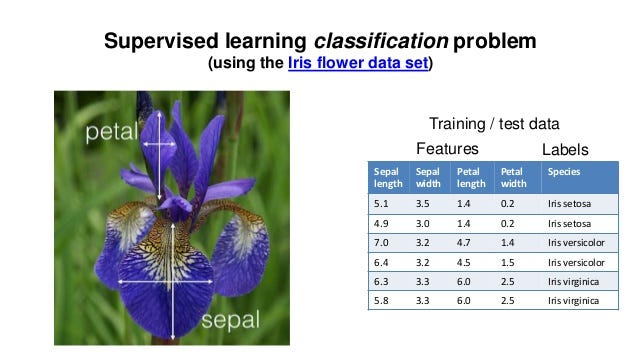

In [ ]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="species")

In [ ]:
print(X)
print("_"*10)
print(y)

Convertimos las etiquetas numéricas a nombres de especies

In [ ]:
y = y.map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

### EDA: Exploratory Data Analysis

Primeras filas del dataset

In [ ]:
print(X.head())

Resumen estadístico

In [ ]:
print(X.describe())

Valores nulos por columna

In [ ]:
print(X.isnull().sum())

Graficamos la distribución de clases

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=y, palette="viridis")
plt.title("Distribución de clases en el dataset")
plt.xlabel("Especie")
plt.ylabel("Cantidad")
plt.show()

Dividimos en train y test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Escalamos los datos

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Entrenamos el modelo con K=5

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
knn.fit(X_train_scaled, y_train)

Hacemos predicciones

In [ ]:
y_pred = knn.predict(X_test_scaled)

Evaluamos el modelo

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Graficamos la matriz de confusión

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()